In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Variables globales
rect = (0, 0, 1, 1)
drawing = False
rectangle = False
show_temp_rect = False


# Callback de la souris
def draw_rectangle(event, x, y, flags, param):
    global rect, drawing, rectangle, show_temp_rect

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        rect = (x, y, 1, 1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        rectangle = True
        rect = (rect[0], rect[1], x - rect[0], y - rect[1])

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            show_temp_rect = True
            rect = (rect[0], rect[1], x - rect[0], y - rect[1])

# Fonction pour effectuer la segmentation GrabCut
def grabcut_segmentation(image, rect):
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Ensure rect is a tuple of integers
    rect = tuple(map(int, rect))

    # Validate rect values
    assert rect[0] >= 0 and rect[1] >= 0, "x ou y invalide "
    assert rect[0] + rect[2] <= image.shape[1], "largeur du rectangla invalide"
    
   
    assert rect[1] + rect[3] <= image.shape[0], "Hauteur du rectangle invalide"

    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Zone d'intérêt pour GrabCut
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Pixels appartenant au premier plan et au probable premier plan
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Appliquer le masque à l'image d'origine
    result = cv2.bitwise_and(image, image, mask=mask2)

    return result


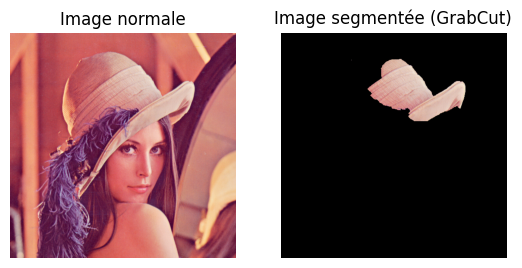

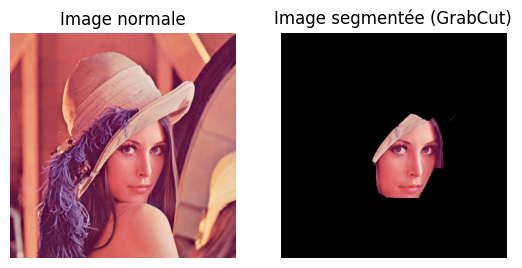

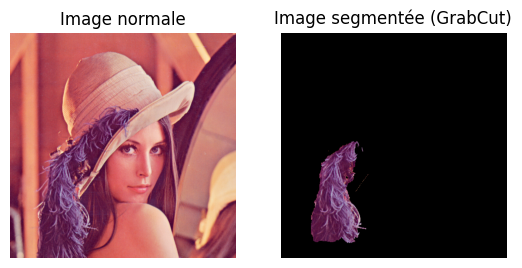

In [4]:
# Chargement de l'image
image = cv2.imread('images/images/lenna.png')
cv2.namedWindow('Image normale')
cv2.setMouseCallback('Image normale', draw_rectangle)


while True:
    temp_image = image.copy()

    if show_temp_rect:
        cv2.rectangle(temp_image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 2)

    cv2.imshow('Image normale', temp_image)

    k = cv2.waitKey(1)

    if rectangle and k == 32:
        result = grabcut_segmentation(image, rect)
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Image normale')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title('Image segmentée (GrabCut)')
        plt.axis('off')
        plt.show()
        show_temp_rect = False


    if k == 27:  # Appuyez sur 'Esc' pour quitter
        break
 
   

cv2.destroyAllWindows()
